In [30]:
#!pip install --quiet --user git+https://github.com/hmmlearn/hmmlearn
from hmmlearn import hmm
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense,BatchNormalization, LeakyReLU, Dense, Reshape, Flatten, Activation
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, multiply, GaussianNoise, MaxPooling2D, concatenate,LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
df_train=pd.read_hdf('dftrain.h5')
df_test=pd.read_hdf('dfvalid.h5')
df_test_y=pd.read_csv('dfvalid_groundtruth.csv')
df_test_y=pd.merge(df_test_y,df_test,left_index=True,right_index=True)
df_train_ds=pd.read_csv('dt_train_ds.csv')
from sklearn.model_selection import train_test_split
df_train_ds=df_train_ds.drop('Unnamed: 0',axis=1)
feature_cols=df_train_ds.columns[1:]
X_train, X_test = train_test_split(df_train_ds[feature_cols], test_size=0.2, random_state=42)

In [32]:
df_train_ds

,id,v_avg_0,v_kurt_0,v_shift_0,v_avg_1,v_kurt_1,v_shift_1,v_avg_2,v_kurt_2,v_shift_2,...,v_shift_56,v_avg_57,v_kurt_57,v_shift_57,v_avg_58,v_kurt_58,v_shift_58,v_avg_59,v_kurt_59,v_shift_59
0,0,0.0390829,0.2263653,-0.0001188,0.0392016,-0.0599682,0.0001219,0.0390797,-0.2707382,0.0001909,...,-0.0003011,0.0393236,-0.3395755,0.0002046,0.0391189,0.0845221,-0.0000159,0.0391348,-0.2109074,-0.0000159
1,1,0.0070044,-1.3217286,0.0026455,0.0043589,-1.1862217,-0.0032923,0.0076512,-1.1379677,0.0067234,...,-0.0011536,0.0016424,-1.4108825,-0.0012140,0.0028565,-1.4461540,-0.0004326,0.0032891,-1.4438811,-0.0004326
2,2,0.0013491,-0.6127737,-0.0075912,0.0089403,-0.9589561,-0.0030554,0.0119957,0.2258686,-0.0092471,...,0.0027286,0.0137073,-1.4400026,0.0007376,0.0129697,-1.4239504,0.0002795,0.0126902,-1.4620963,0.0002795
3,3,0.0066109,-0.9936848,0.0030051,0.0036057,-0.9824369,-0.0021497,0.0057554,-1.4425644,-0.0003394,...,-0.0016918,0.0066299,-0.2813535,0.0021497,0.0044802,-0.3357841,0.0015893,0.0028909,-0.4239741,0.0015893
4,4,0.0280907,-1.3628810,-0.0028024,0.0308931,-1.4714867,0.0095343,0.0213588,-1.5058433,-0.0078558,...,-0.0509626,0.0810509,-0.8542203,0.0069461,0.0741048,-1.1731438,0.0482821,0.0258227,-1.4838246,0.0482821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,1672,-0.0033684,-1.0256128,-0.0023121,-0.0010563,-1.1243702,0.0026750,-0.0037313,-1.2545131,0.0048586,...,-0.0061168,-0.0061985,0.2151451,-0.0040210,-0.0021775,-0.3640717,0.0057935,-0.0079710,-0.2910347,0.0057935
1673,1673,-0.1010157,-1.1011693,-0.0047875,-0.0962283,-1.2064313,-0.0153900,-0.0808383,-1.1511606,-0.0245343,...,-0.0155681,-0.0122376,5.6969573,-0.0051886,-0.0070491,5.9469930,-0.0066987,-0.0003504,0.6313470,-0.0066987
1674,1674,-0.0059063,-1.3029654,0.0102423,-0.0161486,-1.3284689,0.0132687,-0.0294173,-1.2842791,0.0045277,...,0.0013108,-0.0246027,1.6314764,-0.0059670,-0.0186357,3.7024079,0.0040360,-0.0226717,-0.2323829,0.0040360
1675,1675,-0.0271257,0.3510678,-0.0020876,-0.0250381,-0.0571278,0.0010062,-0.0260443,0.2637095,-0.0026140,...,0.0011005,-0.0250607,0.2106426,-0.0029088,-0.0221519,0.4714454,0.0013046,-0.0234565,-0.0215278,0.0013046


In [33]:
df_train=pd.read_hdf('dftrain.h5')

In [59]:
df_test=pd.read_hdf('dfvalid.h5')

In [60]:
df_test_prep=df_test_ds[feature_cols]

NameError: name 'df_test_ds' is not defined

In [35]:
df_test_y=pd.read_csv('dfvalid_groundtruth.csv')

In [36]:
df_test_y=pd.merge(df_test_y,df_test,left_index=True,right_index=True)
df_test_y
fcols=df_test_y.columns[2:61141]

In [37]:
s1=df_test_y[df_test_y['seqID']==1][fcols].T

In [38]:
df_test_y[fcols]

,0,1,2,3,4,5,6,7,8,9,...,61129,61130,61131,61132,61133,61134,61135,61136,61137,61138
0,0.0706501,0.0855238,0.0768474,0.0855238,0.1202291,0.1400607,0.1078343,0.0483395,0.0148737,0.0309869,...,-0.0111553,0.0198316,0.0272684,0.0161132,-0.0024789,-0.0272684,-0.0532974,-0.0632132,-0.0446211,-0.0061974
1,-0.3006850,-0.8826561,-1.7337888,-2.1811790,-1.9423284,-1.7192395,-1.9811265,-2.3230345,-2.3254594,-2.3497082,...,-0.4231415,-1.2779115,-1.3167095,-1.6355812,-2.3400086,-3.2529757,-3.5221374,-2.5934085,-2.4224545,-3.7246148
2,-0.0563976,-0.1520284,-0.0588497,0.1409941,0.1704189,0.1544805,0.2709538,0.3592284,0.3347076,0.3494201,...,0.0294248,0.0674319,0.0821444,0.1581586,0.2108781,0.1728710,0.1458982,0.1606106,0.1409941,0.1127953
3,0.0306180,0.0204120,0.0587467,0.1247123,0.1558282,0.1615535,0.1677767,0.1705149,0.1650385,0.1411415,...,-0.0263862,-0.0694506,-0.0848840,-0.0599914,-0.0482918,-0.0696995,-0.0784119,-0.0599914,-0.0368412,-0.0413218
4,-1.0715973,-6.9125397,-13.6776119,-16.4635190,-15.7900840,-11.6536203,-7.6683107,-9.9429971,-14.3215534,-13.7046476,...,-14.1507368,-14.5808504,-14.4702498,-13.0299837,-7.1767523,-1.3161476,-2.6224639,-7.1914991,-5.8225090,-1.1453310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-18.2914147,-18.2889569,-18.2852701,-18.2828122,-18.2803544,-18.2766676,-18.2717518,-18.2680651,-18.2680651,-18.2705229,...,-19.5043700,-19.5019122,-19.4994543,-19.4969964,-19.4920807,-19.4908518,-19.4908518,-19.4933096,-19.4957675,-19.4994543
590,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,...,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385,-13.3521385
591,0.0317998,-0.1437353,-0.0597837,0.2480388,0.2836546,-0.0101759,-0.1539112,0.0699596,0.2836546,0.1831671,...,-0.0877676,0.1551832,0.2022470,-0.0686877,-0.0928555,0.3040065,0.4566457,0.0610557,-0.2264149,0.0190799
592,-0.0266352,-0.0266352,-0.0067210,0.0092103,-0.0084635,-0.0360944,-0.0390815,-0.0261373,-0.0176738,-0.0176738,...,0.1028068,0.0898626,0.0741802,0.0597424,0.0480429,0.0470472,0.0433133,0.0336051,0.0241459,0.0251416


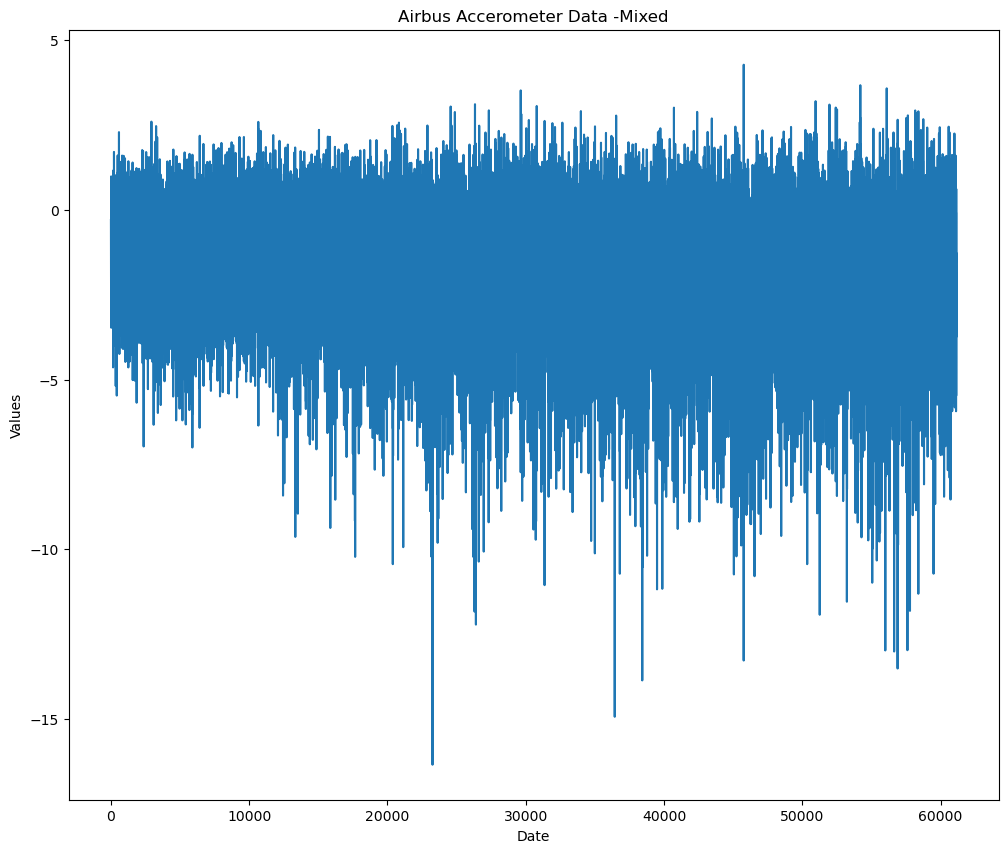

In [39]:
import matplotlib.pyplot as plt
 # Using a inbuilt style to change
# the look and feel of the plot
#plt.style.use("fivethirtyeight")

# setting figure size to 12, 10
plt.figure(figsize=(12, 10))

# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Airbus Accerometer Data -Mixed")
plt.plot(np.array(s1))
#plt.plot(dataframe.rolling( window=2, min_periods=1).mean()["A"])

In [40]:
input = df_train[1:2]
data = input.copy()
data = data.T
data.index = pd.date_range(start='1/1/2018', periods=input.shape[1], freq='L')
df_t1=data.resample('1024L').mean()
df_t1 = df_t1.set_axis(['v_avg'], axis=1, inplace=False)
data_resample_mean = data.resample('1024L').mean()
level_shift = (data_resample_mean - data_resample_mean.shift(-1)).interpolate()
df_t2=level_shift.resample('1024L').max()
df_t2 = df_t2.set_axis(['v_shift'], axis=1, inplace=False)
df_t3=data.resample('1024L').apply(lambda x : kurtosis(x))
df_t3 = df_t3.set_axis(['v_kurt'], axis=1, inplace=False)

C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\13499002.py:6: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t1 = df_t1.set_axis(['v_avg'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\13499002.py:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t2 = df_t2.set_axis(['v_shift'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\13499002.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t3 = df_t3.set_axis(['v_kurt'], axis=1, inplace=False)


In [41]:
df_train_c = df_t1.join(df_t2).join(df_t3)
df_train_c['s']=range(0,len(df_train_c))

In [42]:
def down_sample_preprocess(df):
    dfret = pd.DataFrame()
    for i in range(0, len(df)):
        #print("Row: ", i)
        input = df[i:i + 1]
        #print("Shape of input ",input.shape)
        data = input.copy()
        data = data.T
        data.index = pd.date_range(start='1/1/2018', periods=input.shape[1], freq='L')
        #print(data.head)
        df_t1 = data.resample('1024L').mean()
        df_t1 = df_t1.set_axis(['v_avg'], axis=1, inplace=False)
        data_resample_mean = data.resample('1024L').mean()
        level_shift = (data_resample_mean - data_resample_mean.shift(-1)).interpolate()
        df_t2 = level_shift.resample('1024L').max()
        df_t2 = df_t2.set_axis(['v_shift'], axis=1, inplace=False)
        df_t3 = data.resample('1024L').apply(lambda x: kurtosis(x))
        df_t3 = df_t3.set_axis(['v_kurt'], axis=1, inplace=False)
        df_train_c = df_t1.join(df_t2).join(df_t3)
        df_train_c['s'] = range(0, len(df_train_c))
        df_train_c['id'] = i
        df2 = df_train_c.pivot_table(index=['id'], columns=['s'], values=['v_avg', 'v_shift', 'v_kurt'])
        df2 = df2.sort_index(axis=1, level=1)
        df2.columns = [f'{x}_{y}' for x, y in df2.columns]
        df2 = df2.reset_index()
        if (len(dfret) == 0):
            dfret = df2
        else:
            dfret = dfret.append(df2)
    return dfret


In [43]:
df_train_ds=down_sample_preprocess(df_train)

C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t1 = df_t1.set_axis(['v_avg'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t2 = df_t2.set_axis(['v_shift'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:18: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t3 = df_t3.set_axis(['v_kurt'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be rem

In [44]:
feature_cols=df_train_ds.columns[1:]

In [45]:
feature_cols

Index(['v_avg_0', 'v_kurt_0', 'v_shift_0', 'v_avg_1', 'v_kurt_1', 'v_shift_1',
       'v_avg_2', 'v_kurt_2', 'v_shift_2', 'v_avg_3',
       ...
       'v_shift_56', 'v_avg_57', 'v_kurt_57', 'v_shift_57', 'v_avg_58',
       'v_kurt_58', 'v_shift_58', 'v_avg_59', 'v_kurt_59', 'v_shift_59'],
      dtype='object', length=180)

In [46]:
X_train.shape

(1341, 180)

In [61]:
df_test_ds=down_sample_preprocess (df_test_y[fcols])

C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t1 = df_t1.set_axis(['v_avg'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:16: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t2 = df_t2.set_axis(['v_shift'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:18: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_t3 = df_t3.set_axis(['v_kurt'], axis=1, inplace=False)
C:\Users\SAIL\AppData\Local\Temp\ipykernel_14084\1863175116.py:12: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be rem

In [62]:
df_test_prep=df_test_ds[feature_cols]

# Batch normalizing 

In [47]:
# Defining the Generator network
from tensorflow.keras.layers import Dropout, BatchNormalization
def get_generator(optimizer):
    
    generator = Sequential()
    generator.add(Dense(64, input_dim=180, kernel_initializer=initializers.glorot_normal(seed=42)))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(128))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
    
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
       
    generator.add(Dense(512))
    generator.add(Activation('tanh'))
   
    generator.add(Dense(180, activation='tanh'))
    # Add dropout and batch normalization
    generator.add(Dropout(0.3))
    generator.add(BatchNormalization())
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return generator

In [48]:
##### Defining the Discriminator network

def get_discriminator(optimizer):
    
    discriminator = Sequential()
    
    discriminator.add(Dense(256, input_dim=180, kernel_initializer=initializers.glorot_normal(seed=42)))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
       
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(1))
    discriminator.add(Activation('sigmoid'))
    # Add dropout and batch normalization
    discriminator.add(Dropout(0.3))
    discriminator.add(BatchNormalization())
    
   
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)

    return discriminator

In [49]:
# Defining the Encoder network
def get_encoder(optimizer):
    encoder_input = Input(shape=(64,))
    x = Dense(128, activation='relu')(encoder_input)
    x = Dense(256, activation='relu')(x)
    x = Dense(512, activation='relu')(x)
    encoder_output = Dense(64, activation='tanh')(x)
    
    # Add batch normalization
    encoder_output = BatchNormalization()(encoder_output)
    
    encoder = Model(inputs=encoder_input, outputs=encoder_output)
    encoder.compile(loss='binary_crossentropy', optimizer=optimizer)
    return encoder

In [50]:
def get_gan_network(discriminator, generator, optimizer,input_dim=180):

    discriminator.trainable = False   
    gan_input = Input(shape=(input_dim,))  
    x = generator(gan_input) 
    gan_output = discriminator(x)
    
    gan = Model(inputs=gan_input, outputs=gan_output)    
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return gan

In [51]:
learning_rate = 0.0001
batch_size = 32
epochs = 300
adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)

In [52]:
#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam,input_dim=180)

In [53]:
#Calculating the number of batches based on the batch size
from tqdm import tqdm
batch_count = X_train.shape[0] // batch_size
pbar = tqdm(total=epochs * batch_count)
gan_loss = []
discriminator_loss = []

#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam,input_dim=180)


for epoch in range(epochs):
    for index in range(batch_count):
        pbar.update(1)
        # Creating a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size,180])

        # Generate fake samples
        generated_images = generator.predict_on_batch(noise)

        #Obtain a batch of normal network packets
        image_batch = X_train[index * batch_size: (index + 1) * batch_size]

        X = np.vstack((generated_images,image_batch))
        y_dis = np.ones(2*batch_size)
        y_dis[:batch_size] = 0

        # Train discriminator
        discriminator.trainable = True
        d_loss= discriminator.train_on_batch(X, y_dis)

        # Train generator
        noise = np.random.uniform(0, 1, size=[batch_size, 180])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)

        #Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)

    print("Epoch %d Batch %d/%d [D loss: %f] [G loss:%f]" % (epoch,index,batch_count, d_loss, g_loss))



100%|██████████| 12300/12300 [14:05<00:00, 14.55it/s]

  0%|          | 1/12300 [00:00<3:09:17,  1.08it/s]C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,

  0%|          | 50/12300 [00:07<07:14, 28.17it/s]

Epoch 0 Batch 40/41 [D loss: 2.808886] [G loss:3.795174]



  1%|          | 88/12300 [00:07<03:50, 52.94it/s]


Epoch 1 Batch 40/41 [D loss: 3.496101] [G loss:7.264301]


  1%|          | 131/12300 [00:08<03:34, 56.78it/s]

Epoch 2 Batch 40/41 [D loss: 2.013131] [G loss:13.851835]



  1%|▏         | 173/12300 [00:09<03:34, 56.58it/s]

Epoch 3 Batch 40/41 [D loss: 2.695635] [G loss:14.164769]



  2%|▏         | 216/12300 [00:10<03:25, 58.74it/s]

Epoch 4 Batch 40/41 [D loss: 2.484789] [G loss:12.983459]



  2%|▏         | 253/12300 [00:10<03:26, 58.37it/s]


Epoch 5 Batch 40/41 [D loss: 1.235897] [G loss:12.011355]


  2%|▏         | 295/12300 [00:11<03:28, 57.57it/s]

Epoch 6 Batch 40/41 [D loss: 2.896863] [G loss:10.525928]



  3%|▎         | 337/12300 [00:12<03:26, 58.06it/s]

Epoch 7 Batch 40/41 [D loss: 2.704611] [G loss:12.345726]



  3%|▎         | 379/12300 [00:12<03:29, 56.77it/s]

Epoch 8 Batch 40/41 [D loss: 2.660159] [G loss:8.771019]



  3%|▎         | 421/12300 [00:13<03:27, 57.36it/s]

Epoch 9 Batch 40/41 [D loss: 2.421290] [G loss:12.289739]



  4%|▎         | 457/12300 [00:14<03:23, 58.14it/s]


Epoch 10 Batch 40/41 [D loss: 2.662358] [G loss:9.816986]


  4%|▍         | 502/12300 [00:14<03:26, 57.24it/s]

Epoch 11 Batch 40/41 [D loss: 1.718722] [G loss:9.459029]



  4%|▍         | 540/12300 [00:15<03:17, 59.53it/s]


Epoch 12 Batch 40/41 [D loss: 2.892178] [G loss:9.622318]


  5%|▍         | 582/12300 [00:16<03:19, 58.59it/s]

Epoch 13 Batch 40/41 [D loss: 2.182269] [G loss:8.418803]



  5%|▌         | 625/12300 [00:17<03:27, 56.34it/s]

Epoch 14 Batch 40/41 [D loss: 2.899475] [G loss:12.380943]



  5%|▌         | 667/12300 [00:17<03:25, 56.68it/s]

Epoch 15 Batch 40/41 [D loss: 2.898188] [G loss:10.832663]



  6%|▌         | 706/12300 [00:18<03:13, 59.81it/s]

Epoch 16 Batch 40/41 [D loss: 2.172830] [G loss:11.439164]



  6%|▌         | 745/12300 [00:19<03:17, 58.54it/s]


Epoch 17 Batch 40/41 [D loss: 0.999455] [G loss:10.799466]


  6%|▋         | 790/12300 [00:19<03:11, 60.12it/s]

Epoch 18 Batch 40/41 [D loss: 3.633203] [G loss:10.946360]



  7%|▋         | 825/12300 [00:20<03:10, 60.16it/s]


Epoch 19 Batch 40/41 [D loss: 2.179768] [G loss:9.089821]


  7%|▋         | 868/12300 [00:21<03:14, 58.65it/s]


Epoch 20 Batch 40/41 [D loss: 2.424571] [G loss:10.935819]


  7%|▋         | 910/12300 [00:21<03:14, 58.69it/s]


Epoch 21 Batch 40/41 [D loss: 2.892457] [G loss:10.195683]


  8%|▊         | 952/12300 [00:22<03:14, 58.36it/s]

Epoch 22 Batch 40/41 [D loss: 2.894439] [G loss:9.746999]



  8%|▊         | 994/12300 [00:23<03:14, 58.01it/s]

Epoch 23 Batch 40/41 [D loss: 2.892178] [G loss:8.432481]



  8%|▊         | 1031/12300 [00:23<03:12, 58.53it/s]

Epoch 24 Batch 40/41 [D loss: 3.856237] [G loss:9.523336]



  9%|▊         | 1073/12300 [00:24<03:13, 57.96it/s]


Epoch 25 Batch 40/41 [D loss: 2.897246] [G loss:9.346310]


  9%|▉         | 1115/12300 [00:25<03:10, 58.68it/s]

Epoch 26 Batch 40/41 [D loss: 1.929420] [G loss:5.497707]



  9%|▉         | 1157/12300 [00:26<03:10, 58.36it/s]

Epoch 27 Batch 40/41 [D loss: 0.741367] [G loss:5.742863]



 10%|▉         | 1199/12300 [00:26<03:09, 58.43it/s]

Epoch 28 Batch 40/41 [D loss: 2.169133] [G loss:9.278379]



 10%|█         | 1241/12300 [00:27<03:09, 58.28it/s]

Epoch 29 Batch 40/41 [D loss: 1.694529] [G loss:7.645226]



 10%|█         | 1277/12300 [00:28<03:08, 58.43it/s]


Epoch 30 Batch 40/41 [D loss: 3.375138] [G loss:7.779532]


 11%|█         | 1319/12300 [00:28<03:08, 58.31it/s]


Epoch 31 Batch 40/41 [D loss: 4.097252] [G loss:11.361231]


 11%|█         | 1363/12300 [00:29<03:03, 59.76it/s]

Epoch 32 Batch 40/41 [D loss: 2.422846] [G loss:6.755785]



 11%|█▏        | 1405/12300 [00:30<03:03, 59.49it/s]

Epoch 33 Batch 40/41 [D loss: 2.411699] [G loss:8.307127]



 12%|█▏        | 1443/12300 [00:31<03:01, 59.90it/s]

Epoch 34 Batch 40/41 [D loss: 1.456684] [G loss:8.205611]



 12%|█▏        | 1486/12300 [00:31<03:00, 59.80it/s]

Epoch 35 Batch 40/41 [D loss: 1.928119] [G loss:7.284657]



 12%|█▏        | 1523/12300 [00:32<03:03, 58.76it/s]


Epoch 36 Batch 40/41 [D loss: 2.651163] [G loss:8.174526]


 13%|█▎        | 1565/12300 [00:33<03:11, 55.93it/s]

Epoch 37 Batch 40/41 [D loss: 2.413511] [G loss:9.817923]



 13%|█▎        | 1607/12300 [00:33<03:09, 56.33it/s]

Epoch 38 Batch 40/41 [D loss: 1.214687] [G loss:7.702407]



 13%|█▎        | 1651/12300 [00:34<02:59, 59.41it/s]

Epoch 39 Batch 40/41 [D loss: 2.171560] [G loss:8.259775]



 14%|█▎        | 1687/12300 [00:35<03:00, 58.68it/s]

Epoch 40 Batch 40/41 [D loss: 3.615222] [G loss:7.143738]



 14%|█▍        | 1732/12300 [00:35<02:57, 59.53it/s]

Epoch 41 Batch 40/41 [D loss: 2.892178] [G loss:6.956235]



 14%|█▍        | 1769/12300 [00:36<02:57, 59.29it/s]

Epoch 42 Batch 40/41 [D loss: 1.697859] [G loss:8.097235]



 15%|█▍        | 1812/12300 [00:37<02:57, 59.21it/s]

Epoch 43 Batch 40/41 [D loss: 2.188021] [G loss:8.050217]



 15%|█▌        | 1850/12300 [00:38<03:50, 45.36it/s]

Epoch 44 Batch 40/41 [D loss: 2.420465] [G loss:11.404582]



 15%|█▌        | 1895/12300 [00:39<03:16, 52.82it/s]

Epoch 45 Batch 40/41 [D loss: 3.374207] [G loss:6.865036]



 16%|█▌        | 1938/12300 [00:39<03:07, 55.35it/s]

Epoch 46 Batch 40/41 [D loss: 2.892178] [G loss:9.087446]



 16%|█▌        | 1978/12300 [00:40<02:53, 59.61it/s]

Epoch 47 Batch 40/41 [D loss: 3.133193] [G loss:8.728275]



 16%|█▋        | 2020/12300 [00:41<02:53, 59.19it/s]

Epoch 48 Batch 40/41 [D loss: 2.410163] [G loss:9.278895]



 17%|█▋        | 2057/12300 [00:41<02:58, 57.43it/s]


Epoch 49 Batch 40/41 [D loss: 2.410601] [G loss:9.524557]


 17%|█▋        | 2100/12300 [00:42<02:56, 57.78it/s]

Epoch 50 Batch 40/41 [D loss: 2.410156] [G loss:7.817778]



 17%|█▋        | 2138/12300 [00:43<02:52, 58.95it/s]


Epoch 51 Batch 40/41 [D loss: 1.212053] [G loss:7.192708]


 18%|█▊        | 2183/12300 [00:44<02:49, 59.73it/s]

Epoch 52 Batch 40/41 [D loss: 3.133193] [G loss:9.146741]



 18%|█▊        | 2223/12300 [00:44<02:46, 60.34it/s]

Epoch 53 Batch 40/41 [D loss: 3.133193] [G loss:9.592163]



 18%|█▊        | 2264/12300 [00:45<02:48, 59.42it/s]

Epoch 54 Batch 40/41 [D loss: 2.651163] [G loss:8.408485]



 19%|█▊        | 2306/12300 [00:46<02:52, 58.06it/s]

Epoch 55 Batch 40/41 [D loss: 2.652985] [G loss:9.686798]



 19%|█▉        | 2348/12300 [00:46<02:50, 58.33it/s]

Epoch 56 Batch 40/41 [D loss: 2.169133] [G loss:9.985517]



 19%|█▉        | 2384/12300 [00:47<02:49, 58.48it/s]


Epoch 57 Batch 40/41 [D loss: 1.929978] [G loss:11.260717]


 20%|█▉        | 2426/12300 [00:48<02:49, 58.36it/s]


Epoch 58 Batch 40/41 [D loss: 1.690198] [G loss:9.149562]


 20%|██        | 2468/12300 [00:48<02:51, 57.17it/s]

Epoch 59 Batch 40/41 [D loss: 1.932404] [G loss:9.948275]



 20%|██        | 2510/12300 [00:49<02:51, 56.99it/s]

Epoch 60 Batch 40/41 [D loss: 2.892425] [G loss:9.628693]



 21%|██        | 2550/12300 [00:50<02:41, 60.45it/s]

Epoch 61 Batch 40/41 [D loss: 1.208889] [G loss:10.052713]



 21%|██        | 2594/12300 [00:51<02:42, 59.80it/s]

Epoch 62 Batch 40/41 [D loss: 2.651163] [G loss:10.785339]



 21%|██▏       | 2630/12300 [00:51<02:45, 58.29it/s]


Epoch 63 Batch 40/41 [D loss: 1.932204] [G loss:10.434683]


 22%|██▏       | 2672/12300 [00:52<02:45, 58.34it/s]


Epoch 64 Batch 40/41 [D loss: 1.928118] [G loss:9.396411]


 22%|██▏       | 2714/12300 [00:53<02:44, 58.24it/s]

Epoch 65 Batch 40/41 [D loss: 1.929338] [G loss:9.127614]



 22%|██▏       | 2753/12300 [00:53<02:39, 60.03it/s]


Epoch 66 Batch 40/41 [D loss: 1.205504] [G loss:10.356285]


 23%|██▎       | 2794/12300 [00:54<02:40, 59.11it/s]


Epoch 67 Batch 40/41 [D loss: 2.651163] [G loss:11.395542]


 23%|██▎       | 2836/12300 [00:55<02:41, 58.52it/s]


Epoch 68 Batch 40/41 [D loss: 2.169133] [G loss:11.404544]


 23%|██▎       | 2879/12300 [00:55<02:39, 58.88it/s]

Epoch 69 Batch 40/41 [D loss: 1.206985] [G loss:9.640660]



 24%|██▍       | 2922/12300 [00:56<02:38, 59.35it/s]

Epoch 70 Batch 40/41 [D loss: 1.206378] [G loss:9.685848]



 24%|██▍       | 2958/12300 [00:57<02:40, 58.07it/s]


Epoch 71 Batch 40/41 [D loss: 2.651163] [G loss:8.684423]


 24%|██▍       | 3000/12300 [00:57<02:39, 58.34it/s]


Epoch 72 Batch 40/41 [D loss: 1.928119] [G loss:7.777940]


 25%|██▍       | 3042/12300 [00:58<02:38, 58.40it/s]

Epoch 73 Batch 40/41 [D loss: 2.410148] [G loss:7.195302]



 25%|██▌       | 3084/12300 [00:59<02:39, 57.74it/s]

Epoch 74 Batch 40/41 [D loss: 1.930596] [G loss:9.939590]



 25%|██▌       | 3122/12300 [01:00<02:33, 59.73it/s]

Epoch 75 Batch 40/41 [D loss: 2.410799] [G loss:8.108926]



 26%|██▌       | 3162/12300 [01:00<02:33, 59.59it/s]


Epoch 76 Batch 40/41 [D loss: 2.169133] [G loss:8.423284]


 26%|██▌       | 3209/12300 [01:01<02:33, 59.30it/s]

Epoch 77 Batch 40/41 [D loss: 2.172390] [G loss:8.150798]



 26%|██▋       | 3245/12300 [01:02<02:34, 58.76it/s]


Epoch 78 Batch 40/41 [D loss: 1.688436] [G loss:10.604869]


 27%|██▋       | 3287/12300 [01:02<02:34, 58.33it/s]

Epoch 79 Batch 40/41 [D loss: 1.688379] [G loss:10.419533]



 27%|██▋       | 3329/12300 [01:03<02:40, 55.78it/s]

Epoch 80 Batch 40/41 [D loss: 1.928118] [G loss:9.946430]



 27%|██▋       | 3373/12300 [01:04<02:30, 59.41it/s]

Epoch 81 Batch 40/41 [D loss: 2.416617] [G loss:10.755380]



 28%|██▊       | 3411/12300 [01:04<02:34, 57.59it/s]

Epoch 82 Batch 40/41 [D loss: 2.651163] [G loss:9.248649]



 28%|██▊       | 3453/12300 [01:05<02:36, 56.57it/s]

Epoch 83 Batch 40/41 [D loss: 2.169133] [G loss:9.892076]



 28%|██▊       | 3492/12300 [01:06<02:27, 59.59it/s]

Epoch 84 Batch 40/41 [D loss: 2.171325] [G loss:9.602892]



 29%|██▊       | 3535/12300 [01:07<02:28, 59.18it/s]

Epoch 85 Batch 40/41 [D loss: 1.929771] [G loss:8.426456]



 29%|██▉       | 3579/12300 [01:07<02:25, 59.83it/s]

Epoch 86 Batch 40/41 [D loss: 2.410148] [G loss:8.610239]



 29%|██▉       | 3618/12300 [01:08<02:27, 58.88it/s]

Epoch 87 Batch 40/41 [D loss: 2.651163] [G loss:8.878789]



 30%|██▉       | 3660/12300 [01:09<02:28, 58.28it/s]

Epoch 88 Batch 40/41 [D loss: 1.687104] [G loss:8.577942]



 30%|███       | 3697/12300 [01:09<02:25, 58.98it/s]

Epoch 89 Batch 40/41 [D loss: 2.892178] [G loss:8.942197]



 30%|███       | 3739/12300 [01:10<02:26, 58.35it/s]

Epoch 90 Batch 40/41 [D loss: 2.410148] [G loss:8.421831]



 31%|███       | 3781/12300 [01:11<02:27, 57.65it/s]

Epoch 91 Batch 40/41 [D loss: 1.207448] [G loss:9.926047]



 31%|███       | 3824/12300 [01:12<02:23, 59.22it/s]

Epoch 92 Batch 40/41 [D loss: 1.928461] [G loss:10.858452]



 31%|███▏      | 3860/12300 [01:12<02:30, 55.96it/s]

Epoch 93 Batch 40/41 [D loss: 1.689907] [G loss:11.270607]



 32%|███▏      | 3903/12300 [01:13<02:30, 55.96it/s]

Epoch 94 Batch 40/41 [D loss: 2.410148] [G loss:9.451454]



 32%|███▏      | 3945/12300 [01:14<02:26, 56.99it/s]

Epoch 95 Batch 40/41 [D loss: 1.930839] [G loss:13.052132]



 32%|███▏      | 3987/12300 [01:14<02:31, 54.86it/s]

Epoch 96 Batch 40/41 [D loss: 2.169133] [G loss:8.788280]



 33%|███▎      | 4023/12300 [01:15<02:28, 55.76it/s]


Epoch 97 Batch 40/41 [D loss: 2.172219] [G loss:10.761621]


 33%|███▎      | 4065/12300 [01:16<02:33, 53.69it/s]

Epoch 98 Batch 40/41 [D loss: 2.169133] [G loss:10.067772]



 33%|███▎      | 4107/12300 [01:17<02:24, 56.57it/s]

Epoch 99 Batch 40/41 [D loss: 2.892178] [G loss:10.255429]



 34%|███▎      | 4150/12300 [01:17<02:19, 58.30it/s]

Epoch 100 Batch 40/41 [D loss: 1.208616] [G loss:8.416199]



 34%|███▍      | 4192/12300 [01:18<02:22, 56.78it/s]

Epoch 101 Batch 40/41 [D loss: 2.169133] [G loss:10.979782]



 34%|███▍      | 4234/12300 [01:19<02:20, 57.40it/s]

Epoch 102 Batch 40/41 [D loss: 3.615222] [G loss:11.351974]



 35%|███▍      | 4271/12300 [01:19<02:17, 58.58it/s]


Epoch 103 Batch 40/41 [D loss: 1.928118] [G loss:11.355178]


 35%|███▌      | 4314/12300 [01:20<02:16, 58.51it/s]

Epoch 104 Batch 40/41 [D loss: 1.687104] [G loss:8.898315]



 35%|███▌      | 4356/12300 [01:21<02:23, 55.25it/s]

Epoch 105 Batch 40/41 [D loss: 3.133193] [G loss:9.161228]



 36%|███▌      | 4394/12300 [01:22<02:12, 59.74it/s]

Epoch 106 Batch 40/41 [D loss: 2.651163] [G loss:11.280622]



 36%|███▌      | 4437/12300 [01:22<02:12, 59.37it/s]

Epoch 107 Batch 40/41 [D loss: 2.169669] [G loss:10.907298]



 36%|███▋      | 4480/12300 [01:23<02:13, 58.76it/s]

Epoch 108 Batch 40/41 [D loss: 2.892178] [G loss:7.395849]



 37%|███▋      | 4516/12300 [01:24<02:12, 58.71it/s]


Epoch 109 Batch 40/41 [D loss: 2.410148] [G loss:9.040575]


 37%|███▋      | 4558/12300 [01:24<02:13, 58.12it/s]


Epoch 110 Batch 40/41 [D loss: 1.928118] [G loss:10.847007]


 37%|███▋      | 4600/12300 [01:25<02:12, 57.96it/s]

Epoch 111 Batch 40/41 [D loss: 1.687104] [G loss:11.231371]



 38%|███▊      | 4642/12300 [01:26<02:10, 58.48it/s]

Epoch 112 Batch 40/41 [D loss: 2.169133] [G loss:9.127172]



 38%|███▊      | 4684/12300 [01:27<02:09, 58.76it/s]

Epoch 113 Batch 40/41 [D loss: 2.651163] [G loss:9.987258]



 38%|███▊      | 4726/12300 [01:27<02:09, 58.58it/s]

Epoch 114 Batch 40/41 [D loss: 2.410148] [G loss:9.064632]



 39%|███▊      | 4762/12300 [01:28<02:08, 58.53it/s]

Epoch 115 Batch 40/41 [D loss: 2.416594] [G loss:12.171360]



 39%|███▉      | 4804/12300 [01:29<02:08, 58.48it/s]

Epoch 116 Batch 40/41 [D loss: 2.169133] [G loss:10.953501]



 39%|███▉      | 4846/12300 [01:29<02:07, 58.29it/s]

Epoch 117 Batch 40/41 [D loss: 3.133193] [G loss:10.048231]



 40%|███▉      | 4888/12300 [01:30<02:09, 57.04it/s]

Epoch 118 Batch 40/41 [D loss: 2.651163] [G loss:9.898413]



 40%|████      | 4930/12300 [01:31<02:09, 56.91it/s]

Epoch 119 Batch 40/41 [D loss: 1.688225] [G loss:9.816741]



 40%|████      | 4972/12300 [01:32<02:06, 57.94it/s]

Epoch 120 Batch 40/41 [D loss: 1.928119] [G loss:11.369282]



 41%|████      | 5008/12300 [01:32<02:13, 54.58it/s]

Epoch 121 Batch 40/41 [D loss: 2.410676] [G loss:11.883339]



 41%|████      | 5050/12300 [01:33<02:36, 46.32it/s]


Epoch 122 Batch 40/41 [D loss: 1.450054] [G loss:9.650854]


 41%|████▏     | 5090/12300 [01:34<02:03, 58.19it/s]


Epoch 123 Batch 40/41 [D loss: 1.928119] [G loss:11.728346]


 42%|████▏     | 5132/12300 [01:35<02:03, 58.09it/s]

Epoch 124 Batch 40/41 [D loss: 2.903112] [G loss:10.541058]



 42%|████▏     | 5174/12300 [01:35<02:02, 58.20it/s]

Epoch 125 Batch 40/41 [D loss: 2.892178] [G loss:10.443293]



 42%|████▏     | 5216/12300 [01:36<02:01, 58.47it/s]

Epoch 126 Batch 40/41 [D loss: 1.928119] [G loss:10.850949]



 43%|████▎     | 5259/12300 [01:37<02:05, 56.31it/s]

Epoch 127 Batch 40/41 [D loss: 1.928119] [G loss:9.983190]



 43%|████▎     | 5295/12300 [01:37<02:00, 58.10it/s]

Epoch 128 Batch 40/41 [D loss: 1.928118] [G loss:11.697575]



 43%|████▎     | 5339/12300 [01:38<01:57, 59.38it/s]

Epoch 129 Batch 40/41 [D loss: 2.892178] [G loss:11.673565]



 44%|████▎     | 5377/12300 [01:39<01:56, 59.53it/s]


Epoch 130 Batch 40/41 [D loss: 2.892178] [G loss:10.813974]


 44%|████▍     | 5420/12300 [01:40<01:55, 59.77it/s]

Epoch 131 Batch 40/41 [D loss: 2.651163] [G loss:10.934241]



 44%|████▍     | 5460/12300 [01:40<01:56, 58.93it/s]


Epoch 132 Batch 40/41 [D loss: 1.207186] [G loss:11.282373]


 45%|████▍     | 5502/12300 [01:41<01:58, 57.32it/s]

Epoch 133 Batch 40/41 [D loss: 2.651163] [G loss:13.580789]



 45%|████▌     | 5544/12300 [01:42<01:56, 57.88it/s]

Epoch 134 Batch 40/41 [D loss: 2.410148] [G loss:11.456768]



 45%|████▌     | 5586/12300 [01:42<01:56, 57.70it/s]

Epoch 135 Batch 40/41 [D loss: 1.688848] [G loss:11.756552]



 46%|████▌     | 5628/12300 [01:43<01:56, 57.30it/s]

Epoch 136 Batch 40/41 [D loss: 2.651163] [G loss:12.228466]



 46%|████▌     | 5664/12300 [01:44<01:53, 58.32it/s]


Epoch 137 Batch 40/41 [D loss: 2.892178] [G loss:9.803263]


 46%|████▋     | 5706/12300 [01:44<01:53, 58.18it/s]


Epoch 138 Batch 40/41 [D loss: 2.169133] [G loss:13.646032]


 47%|████▋     | 5748/12300 [01:45<01:52, 58.48it/s]

Epoch 139 Batch 40/41 [D loss: 2.418780] [G loss:13.088875]



 47%|████▋     | 5790/12300 [01:46<01:50, 58.83it/s]

Epoch 140 Batch 40/41 [D loss: 2.169133] [G loss:12.922482]



 47%|████▋     | 5828/12300 [01:47<01:47, 59.94it/s]


Epoch 141 Batch 40/41 [D loss: 2.169133] [G loss:11.895242]


 48%|████▊     | 5869/12300 [01:47<01:47, 59.64it/s]


Epoch 142 Batch 40/41 [D loss: 2.651163] [G loss:10.336226]


 48%|████▊     | 5911/12300 [01:48<01:48, 59.09it/s]

Epoch 143 Batch 40/41 [D loss: 1.714647] [G loss:12.175755]



 48%|████▊     | 5954/12300 [01:49<01:48, 58.40it/s]

Epoch 144 Batch 40/41 [D loss: 1.446089] [G loss:11.292510]



 49%|████▊     | 5996/12300 [01:49<01:48, 58.04it/s]

Epoch 145 Batch 40/41 [D loss: 2.169133] [G loss:11.800802]



 49%|████▉     | 6038/12300 [01:50<01:48, 57.56it/s]

Epoch 146 Batch 40/41 [D loss: 2.169133] [G loss:11.754499]



 49%|████▉     | 6075/12300 [01:51<01:47, 57.85it/s]


Epoch 147 Batch 40/41 [D loss: 3.615222] [G loss:13.143479]


 50%|████▉     | 6117/12300 [01:52<01:48, 56.88it/s]


Epoch 148 Batch 40/41 [D loss: 1.205074] [G loss:12.656176]


 50%|█████     | 6159/12300 [01:52<01:46, 57.64it/s]

Epoch 149 Batch 40/41 [D loss: 2.169133] [G loss:11.705946]



 50%|█████     | 6201/12300 [01:53<01:56, 52.57it/s]

Epoch 150 Batch 40/41 [D loss: 1.687104] [G loss:11.237101]



 51%|█████     | 6239/12300 [01:54<01:44, 57.83it/s]


Epoch 151 Batch 40/41 [D loss: 1.700808] [G loss:13.079494]


 51%|█████     | 6279/12300 [01:54<01:39, 60.80it/s]

Epoch 152 Batch 40/41 [D loss: 2.892178] [G loss:13.106158]



 51%|█████▏    | 6325/12300 [01:55<01:41, 58.80it/s]

Epoch 153 Batch 40/41 [D loss: 2.169133] [G loss:11.805737]



 52%|█████▏    | 6361/12300 [01:56<01:43, 57.59it/s]


Epoch 154 Batch 40/41 [D loss: 2.892178] [G loss:11.361102]


 52%|█████▏    | 6403/12300 [01:56<01:43, 56.90it/s]

Epoch 155 Batch 40/41 [D loss: 2.651163] [G loss:11.820337]



 52%|█████▏    | 6445/12300 [01:57<01:41, 57.57it/s]

Epoch 156 Batch 40/41 [D loss: 2.169133] [G loss:11.232394]



 53%|█████▎    | 6487/12300 [01:58<01:40, 58.12it/s]

Epoch 157 Batch 40/41 [D loss: 2.410148] [G loss:13.049339]



 53%|█████▎    | 6529/12300 [01:59<01:39, 57.93it/s]

Epoch 158 Batch 40/41 [D loss: 2.408715] [G loss:12.150405]



 53%|█████▎    | 6571/12300 [01:59<01:39, 57.72it/s]

Epoch 159 Batch 40/41 [D loss: 2.651163] [G loss:12.194641]



 54%|█████▎    | 6607/12300 [02:00<01:39, 57.38it/s]


Epoch 160 Batch 40/41 [D loss: 2.169133] [G loss:12.118359]


 54%|█████▍    | 6649/12300 [02:01<01:35, 59.13it/s]


Epoch 161 Batch 40/41 [D loss: 2.651163] [G loss:10.315866]


 54%|█████▍    | 6692/12300 [02:01<01:35, 59.02it/s]

Epoch 162 Batch 40/41 [D loss: 2.892178] [G loss:11.689870]



 55%|█████▍    | 6734/12300 [02:02<01:35, 58.30it/s]

Epoch 163 Batch 40/41 [D loss: 2.892178] [G loss:12.126827]



 55%|█████▌    | 6771/12300 [02:03<01:33, 59.10it/s]


Epoch 164 Batch 40/41 [D loss: 2.892178] [G loss:8.285303]


 55%|█████▌    | 6815/12300 [02:04<01:32, 59.42it/s]

Epoch 165 Batch 40/41 [D loss: 1.929792] [G loss:11.244596]



 56%|█████▌    | 6852/12300 [02:04<01:31, 59.73it/s]


Epoch 166 Batch 40/41 [D loss: 2.892178] [G loss:12.050741]


 56%|█████▌    | 6897/12300 [02:05<01:32, 58.59it/s]

Epoch 167 Batch 40/41 [D loss: 2.651163] [G loss:11.254820]



 56%|█████▋    | 6939/12300 [02:06<01:32, 58.09it/s]

Epoch 168 Batch 40/41 [D loss: 1.928119] [G loss:10.766100]



 57%|█████▋    | 6981/12300 [02:06<01:31, 58.42it/s]

Epoch 169 Batch 40/41 [D loss: 2.410148] [G loss:11.174329]



 57%|█████▋    | 7017/12300 [02:07<01:30, 58.07it/s]


Epoch 170 Batch 40/41 [D loss: 3.374207] [G loss:12.159954]


 57%|█████▋    | 7059/12300 [02:08<01:34, 55.31it/s]

Epoch 171 Batch 40/41 [D loss: 3.133193] [G loss:11.764334]



 58%|█████▊    | 7103/12300 [02:08<01:30, 57.63it/s]

Epoch 172 Batch 40/41 [D loss: 2.174592] [G loss:10.301861]



 58%|█████▊    | 7145/12300 [02:09<01:30, 57.19it/s]

Epoch 173 Batch 40/41 [D loss: 2.410148] [G loss:10.184589]



 58%|█████▊    | 7186/12300 [02:10<01:24, 60.74it/s]

Epoch 174 Batch 40/41 [D loss: 1.928119] [G loss:11.233501]



 59%|█████▊    | 7224/12300 [02:11<01:26, 59.00it/s]

Epoch 175 Batch 40/41 [D loss: 2.410148] [G loss:9.782036]



 59%|█████▉    | 7266/12300 [02:11<01:26, 58.51it/s]

Epoch 176 Batch 40/41 [D loss: 2.651163] [G loss:9.936152]



 59%|█████▉    | 7308/12300 [02:12<01:26, 57.97it/s]

Epoch 177 Batch 40/41 [D loss: 2.169133] [G loss:10.357085]



 60%|█████▉    | 7350/12300 [02:13<01:25, 57.76it/s]

Epoch 178 Batch 40/41 [D loss: 1.446089] [G loss:11.641322]



 60%|██████    | 7386/12300 [02:13<01:24, 58.31it/s]


Epoch 179 Batch 40/41 [D loss: 3.133193] [G loss:9.743032]


 60%|██████    | 7428/12300 [02:14<01:23, 58.29it/s]


Epoch 180 Batch 40/41 [D loss: 2.892178] [G loss:8.861559]


 61%|██████    | 7470/12300 [02:15<01:22, 58.32it/s]

Epoch 181 Batch 40/41 [D loss: 2.651163] [G loss:10.198751]



 61%|██████    | 7512/12300 [02:16<01:22, 58.28it/s]

Epoch 182 Batch 40/41 [D loss: 1.928119] [G loss:9.026481]



 61%|██████▏   | 7554/12300 [02:16<01:21, 58.20it/s]

Epoch 183 Batch 40/41 [D loss: 2.892178] [G loss:10.835859]



 62%|██████▏   | 7596/12300 [02:17<01:20, 58.43it/s]

Epoch 184 Batch 40/41 [D loss: 2.410148] [G loss:10.647321]



 62%|██████▏   | 7635/12300 [02:18<01:18, 59.21it/s]

Epoch 185 Batch 40/41 [D loss: 2.651163] [G loss:8.655468]



 62%|██████▏   | 7677/12300 [02:18<01:19, 58.32it/s]

Epoch 186 Batch 40/41 [D loss: 2.169133] [G loss:10.636654]



 63%|██████▎   | 7719/12300 [02:19<01:18, 58.22it/s]

Epoch 187 Batch 40/41 [D loss: 3.133193] [G loss:10.220977]



 63%|██████▎   | 7755/12300 [02:20<01:18, 58.11it/s]


Epoch 188 Batch 40/41 [D loss: 3.856237] [G loss:10.283412]


 63%|██████▎   | 7797/12300 [02:20<01:16, 58.67it/s]


Epoch 189 Batch 40/41 [D loss: 1.928118] [G loss:12.191029]


 64%|██████▎   | 7839/12300 [02:21<01:16, 58.33it/s]


Epoch 190 Batch 40/41 [D loss: 1.928119] [G loss:12.642835]


 64%|██████▍   | 7881/12300 [02:22<01:15, 58.55it/s]

Epoch 191 Batch 40/41 [D loss: 2.169133] [G loss:9.821364]



 64%|██████▍   | 7923/12300 [02:23<01:15, 58.23it/s]

Epoch 192 Batch 40/41 [D loss: 1.205074] [G loss:10.883252]



 65%|██████▍   | 7965/12300 [02:23<01:17, 56.22it/s]

Epoch 193 Batch 40/41 [D loss: 3.133193] [G loss:11.600653]



 65%|██████▌   | 8001/12300 [02:24<01:14, 57.35it/s]

Epoch 194 Batch 40/41 [D loss: 2.169133] [G loss:12.145422]



 65%|██████▌   | 8043/12300 [02:25<01:14, 56.94it/s]


Epoch 195 Batch 40/41 [D loss: 1.928118] [G loss:10.659389]


 66%|██████▌   | 8085/12300 [02:25<01:13, 57.04it/s]

Epoch 196 Batch 40/41 [D loss: 1.928118] [G loss:10.698408]



 66%|██████▌   | 8129/12300 [02:26<01:10, 59.42it/s]

Epoch 197 Batch 40/41 [D loss: 2.410148] [G loss:9.965341]



 66%|██████▋   | 8165/12300 [02:27<01:09, 59.61it/s]


Epoch 198 Batch 40/41 [D loss: 1.687104] [G loss:11.255526]


 67%|██████▋   | 8209/12300 [02:27<01:09, 58.81it/s]

Epoch 199 Batch 40/41 [D loss: 2.169133] [G loss:8.476480]



 67%|██████▋   | 8251/12300 [02:28<01:09, 58.52it/s]

Epoch 200 Batch 40/41 [D loss: 1.446089] [G loss:8.834337]



 67%|██████▋   | 8288/12300 [02:29<01:07, 59.60it/s]


Epoch 201 Batch 40/41 [D loss: 4.097252] [G loss:12.065985]


 68%|██████▊   | 8330/12300 [02:30<01:07, 59.23it/s]

Epoch 202 Batch 40/41 [D loss: 1.446089] [G loss:9.721170]



 68%|██████▊   | 8372/12300 [02:30<01:06, 58.64it/s]

Epoch 203 Batch 40/41 [D loss: 1.446495] [G loss:9.659180]



 68%|██████▊   | 8414/12300 [02:31<01:06, 58.77it/s]

Epoch 204 Batch 40/41 [D loss: 2.892178] [G loss:8.807397]



 69%|██████▊   | 8456/12300 [02:32<01:05, 59.01it/s]

Epoch 205 Batch 40/41 [D loss: 3.615222] [G loss:9.773122]



 69%|██████▉   | 8493/12300 [02:32<01:04, 59.24it/s]

Epoch 206 Batch 40/41 [D loss: 2.410148] [G loss:9.382646]



 69%|██████▉   | 8537/12300 [02:33<01:14, 50.80it/s]

Epoch 207 Batch 40/41 [D loss: 2.169133] [G loss:9.763325]



 70%|██████▉   | 8575/12300 [02:34<01:19, 47.09it/s]

Epoch 208 Batch 40/41 [D loss: 1.687104] [G loss:10.151360]



 70%|███████   | 8619/12300 [02:35<01:03, 57.64it/s]

Epoch 209 Batch 40/41 [D loss: 2.410148] [G loss:8.524613]



 70%|███████   | 8657/12300 [02:36<01:00, 59.76it/s]

Epoch 210 Batch 40/41 [D loss: 2.169133] [G loss:9.303780]



 71%|███████   | 8699/12300 [02:36<00:59, 60.24it/s]

Epoch 211 Batch 40/41 [D loss: 2.892178] [G loss:9.195337]



 71%|███████   | 8744/12300 [02:37<01:00, 58.77it/s]

Epoch 212 Batch 40/41 [D loss: 3.133193] [G loss:8.308867]



 71%|███████▏  | 8780/12300 [02:38<01:00, 58.30it/s]

Epoch 213 Batch 40/41 [D loss: 2.169133] [G loss:10.827473]



 72%|███████▏  | 8824/12300 [02:39<01:22, 41.91it/s]

Epoch 214 Batch 40/41 [D loss: 3.374207] [G loss:9.341547]



 72%|███████▏  | 8865/12300 [02:39<01:02, 54.72it/s]

Epoch 215 Batch 40/41 [D loss: 2.410148] [G loss:9.360559]



 72%|███████▏  | 8908/12300 [02:40<00:58, 58.12it/s]

Epoch 216 Batch 40/41 [D loss: 1.687104] [G loss:9.714436]



 73%|███████▎  | 8944/12300 [02:41<00:59, 56.11it/s]


Epoch 217 Batch 40/41 [D loss: 2.410148] [G loss:9.230698]


 73%|███████▎  | 8987/12300 [02:42<00:56, 58.18it/s]

Epoch 218 Batch 40/41 [D loss: 2.892178] [G loss:7.892548]



 73%|███████▎  | 9031/12300 [02:42<00:55, 59.15it/s]

Epoch 219 Batch 40/41 [D loss: 1.205074] [G loss:9.874982]



 74%|███████▎  | 9067/12300 [02:43<00:55, 58.26it/s]


Epoch 220 Batch 40/41 [D loss: 1.928119] [G loss:9.713226]


 74%|███████▍  | 9112/12300 [02:44<00:53, 59.58it/s]

Epoch 221 Batch 40/41 [D loss: 1.448380] [G loss:10.730171]



 74%|███████▍  | 9149/12300 [02:44<00:52, 59.64it/s]


Epoch 222 Batch 40/41 [D loss: 1.687104] [G loss:8.839071]


 75%|███████▍  | 9191/12300 [02:45<00:51, 60.29it/s]

Epoch 223 Batch 40/41 [D loss: 2.410148] [G loss:10.735764]



 75%|███████▌  | 9233/12300 [02:46<00:51, 60.10it/s]

Epoch 224 Batch 40/41 [D loss: 2.410148] [G loss:7.803293]



 75%|███████▌  | 9276/12300 [02:46<00:51, 58.70it/s]

Epoch 225 Batch 40/41 [D loss: 2.169133] [G loss:9.283936]



 76%|███████▌  | 9318/12300 [02:47<00:50, 58.65it/s]

Epoch 226 Batch 40/41 [D loss: 1.687104] [G loss:9.825878]



 76%|███████▌  | 9354/12300 [02:48<00:50, 58.62it/s]

Epoch 227 Batch 40/41 [D loss: 3.133193] [G loss:9.192169]



 76%|███████▋  | 9396/12300 [02:49<00:49, 58.41it/s]


Epoch 228 Batch 40/41 [D loss: 4.097252] [G loss:8.339576]


 77%|███████▋  | 9438/12300 [02:49<00:49, 58.24it/s]

Epoch 229 Batch 40/41 [D loss: 3.374207] [G loss:11.191356]



 77%|███████▋  | 9480/12300 [02:50<00:49, 56.68it/s]

Epoch 230 Batch 40/41 [D loss: 2.651163] [G loss:7.845387]



 77%|███████▋  | 9522/12300 [02:51<00:48, 57.60it/s]

Epoch 231 Batch 40/41 [D loss: 1.928119] [G loss:8.812479]



 78%|███████▊  | 9564/12300 [02:51<00:47, 57.85it/s]

Epoch 232 Batch 40/41 [D loss: 1.446089] [G loss:9.223451]



 78%|███████▊  | 9606/12300 [02:52<00:46, 57.85it/s]

Epoch 233 Batch 40/41 [D loss: 1.687104] [G loss:6.415092]



 78%|███████▊  | 9642/12300 [02:53<00:45, 58.37it/s]


Epoch 234 Batch 40/41 [D loss: 1.688231] [G loss:7.844996]


 79%|███████▊  | 9684/12300 [02:54<00:45, 58.12it/s]

Epoch 235 Batch 40/41 [D loss: 2.169133] [G loss:9.641146]



 79%|███████▉  | 9726/12300 [02:54<00:43, 58.63it/s]

Epoch 236 Batch 40/41 [D loss: 3.374207] [G loss:9.270395]



 79%|███████▉  | 9765/12300 [02:55<00:42, 59.86it/s]


Epoch 237 Batch 40/41 [D loss: 2.169133] [G loss:9.341526]


 80%|███████▉  | 9806/12300 [02:56<00:41, 59.39it/s]


Epoch 238 Batch 40/41 [D loss: 2.169133] [G loss:9.676475]


 80%|████████  | 9848/12300 [02:56<00:42, 58.07it/s]

Epoch 239 Batch 40/41 [D loss: 2.892178] [G loss:8.276713]



 80%|████████  | 9890/12300 [02:57<00:42, 56.14it/s]

Epoch 240 Batch 40/41 [D loss: 2.169133] [G loss:9.274710]



 81%|████████  | 9934/12300 [02:58<00:39, 59.17it/s]

Epoch 241 Batch 40/41 [D loss: 0.968184] [G loss:11.150299]



 81%|████████  | 9973/12300 [02:58<00:38, 60.09it/s]

Epoch 242 Batch 40/41 [D loss: 2.410148] [G loss:7.818213]



 81%|████████▏ | 10014/12300 [02:59<00:38, 59.32it/s]

Epoch 243 Batch 40/41 [D loss: 1.928118] [G loss:10.300478]



 82%|████████▏ | 10056/12300 [03:00<00:38, 58.25it/s]

Epoch 244 Batch 40/41 [D loss: 2.651163] [G loss:8.908112]



 82%|████████▏ | 10092/12300 [03:00<00:38, 58.08it/s]


Epoch 245 Batch 40/41 [D loss: 2.169133] [G loss:10.650151]


 82%|████████▏ | 10134/12300 [03:01<00:37, 58.43it/s]


Epoch 246 Batch 40/41 [D loss: 2.169133] [G loss:9.724988]


 83%|████████▎ | 10176/12300 [03:02<00:36, 58.64it/s]

Epoch 247 Batch 40/41 [D loss: 2.651163] [G loss:10.122622]



 83%|████████▎ | 10218/12300 [03:03<00:36, 57.28it/s]

Epoch 248 Batch 40/41 [D loss: 2.410148] [G loss:12.057323]



 83%|████████▎ | 10260/12300 [03:03<00:35, 57.76it/s]

Epoch 249 Batch 40/41 [D loss: 1.687104] [G loss:10.265638]



 84%|████████▍ | 10302/12300 [03:04<00:34, 58.43it/s]

Epoch 250 Batch 40/41 [D loss: 1.688996] [G loss:9.904401]



 84%|████████▍ | 10338/12300 [03:05<00:33, 58.26it/s]


Epoch 251 Batch 40/41 [D loss: 2.169133] [G loss:12.098949]


 84%|████████▍ | 10380/12300 [03:05<00:32, 58.20it/s]


Epoch 252 Batch 40/41 [D loss: 2.174816] [G loss:11.590322]


 85%|████████▍ | 10422/12300 [03:06<00:32, 58.23it/s]

Epoch 253 Batch 40/41 [D loss: 2.654419] [G loss:10.315451]



 85%|████████▌ | 10464/12300 [03:07<00:31, 58.10it/s]

Epoch 254 Batch 40/41 [D loss: 2.169133] [G loss:9.339575]



 85%|████████▌ | 10506/12300 [03:08<00:30, 57.90it/s]

Epoch 255 Batch 40/41 [D loss: 2.410211] [G loss:11.107367]



 86%|████████▌ | 10548/12300 [03:08<00:30, 58.20it/s]

Epoch 256 Batch 40/41 [D loss: 1.205664] [G loss:8.790560]



 86%|████████▌ | 10585/12300 [03:09<00:28, 59.54it/s]

Epoch 257 Batch 40/41 [D loss: 2.892178] [G loss:8.345192]



 86%|████████▋ | 10628/12300 [03:10<00:28, 58.19it/s]

Epoch 258 Batch 40/41 [D loss: 2.417814] [G loss:8.873414]



 87%|████████▋ | 10671/12300 [03:10<00:27, 58.96it/s]

Epoch 259 Batch 40/41 [D loss: 2.446050] [G loss:9.380863]



 87%|████████▋ | 10707/12300 [03:11<00:27, 57.91it/s]


Epoch 260 Batch 40/41 [D loss: 1.475390] [G loss:10.671700]


 87%|████████▋ | 10749/12300 [03:12<00:26, 58.34it/s]


Epoch 261 Batch 40/41 [D loss: 1.928119] [G loss:9.283560]


 88%|████████▊ | 10791/12300 [03:13<00:26, 56.24it/s]

Epoch 262 Batch 40/41 [D loss: 2.169812] [G loss:7.838445]



 88%|████████▊ | 10833/12300 [03:13<00:26, 55.74it/s]

Epoch 263 Batch 40/41 [D loss: 2.410961] [G loss:11.641986]



 88%|████████▊ | 10872/12300 [03:14<00:23, 59.54it/s]


Epoch 264 Batch 40/41 [D loss: 3.133193] [G loss:10.372330]


 89%|████████▊ | 10914/12300 [03:15<00:23, 58.93it/s]

Epoch 265 Batch 40/41 [D loss: 2.423718] [G loss:11.108912]



 89%|████████▉ | 10957/12300 [03:15<00:23, 58.20it/s]

Epoch 266 Batch 40/41 [D loss: 3.134537] [G loss:14.109409]



 89%|████████▉ | 10999/12300 [03:16<00:22, 58.19it/s]

Epoch 267 Batch 40/41 [D loss: 2.892178] [G loss:11.575464]



 90%|████████▉ | 11035/12300 [03:17<00:22, 57.02it/s]


Epoch 268 Batch 40/41 [D loss: 1.697372] [G loss:14.491789]


 90%|█████████ | 11077/12300 [03:17<00:21, 57.49it/s]

Epoch 269 Batch 40/41 [D loss: 2.174963] [G loss:12.096334]



 90%|█████████ | 11119/12300 [03:18<00:20, 57.85it/s]

Epoch 270 Batch 40/41 [D loss: 3.374207] [G loss:13.561652]



 91%|█████████ | 11161/12300 [03:19<00:19, 58.45it/s]

Epoch 271 Batch 40/41 [D loss: 2.903338] [G loss:11.300451]



 91%|█████████ | 11203/12300 [03:20<00:18, 57.85it/s]

Epoch 272 Batch 40/41 [D loss: 1.446089] [G loss:12.577960]



 91%|█████████▏| 11245/12300 [03:20<00:18, 58.18it/s]

Epoch 273 Batch 40/41 [D loss: 1.928119] [G loss:14.031869]



 92%|█████████▏| 11281/12300 [03:21<00:17, 57.87it/s]

Epoch 274 Batch 40/41 [D loss: 2.651163] [G loss:12.239826]



 92%|█████████▏| 11326/12300 [03:22<00:16, 59.70it/s]

Epoch 275 Batch 40/41 [D loss: 2.651163] [G loss:13.978860]



 92%|█████████▏| 11365/12300 [03:22<00:15, 59.64it/s]

Epoch 276 Batch 40/41 [D loss: 3.374207] [G loss:11.274411]



 93%|█████████▎| 11405/12300 [03:23<00:15, 58.86it/s]


Epoch 277 Batch 40/41 [D loss: 2.651163] [G loss:13.030924]


 93%|█████████▎| 11447/12300 [03:24<00:14, 58.18it/s]

Epoch 278 Batch 40/41 [D loss: 2.651163] [G loss:14.589767]



 93%|█████████▎| 11491/12300 [03:25<00:13, 59.51it/s]

Epoch 279 Batch 40/41 [D loss: 1.687104] [G loss:12.674816]



 94%|█████████▎| 11528/12300 [03:25<00:12, 59.40it/s]

Epoch 280 Batch 40/41 [D loss: 2.651163] [G loss:13.176495]



 94%|█████████▍| 11570/12300 [03:26<00:12, 58.36it/s]

Epoch 281 Batch 40/41 [D loss: 1.446089] [G loss:12.551841]



 94%|█████████▍| 11612/12300 [03:27<00:11, 58.14it/s]

Epoch 282 Batch 40/41 [D loss: 2.169133] [G loss:12.657076]



 95%|█████████▍| 11654/12300 [03:27<00:11, 58.45it/s]

Epoch 283 Batch 40/41 [D loss: 2.169133] [G loss:9.977900]



 95%|█████████▌| 11696/12300 [03:28<00:10, 58.27it/s]

Epoch 284 Batch 40/41 [D loss: 2.892178] [G loss:12.221111]



 95%|█████████▌| 11732/12300 [03:29<00:10, 56.29it/s]


Epoch 285 Batch 40/41 [D loss: 2.410148] [G loss:9.751390]


 96%|█████████▌| 11774/12300 [03:29<00:09, 55.72it/s]

Epoch 286 Batch 40/41 [D loss: 2.651163] [G loss:11.299483]



 96%|█████████▌| 11814/12300 [03:30<00:08, 59.85it/s]


Epoch 287 Batch 40/41 [D loss: 2.410148] [G loss:12.107519]


 96%|█████████▋| 11858/12300 [03:31<00:07, 60.01it/s]

Epoch 288 Batch 40/41 [D loss: 2.169133] [G loss:10.658968]



 97%|█████████▋| 11900/12300 [03:32<00:06, 58.28it/s]

Epoch 289 Batch 40/41 [D loss: 1.448339] [G loss:10.779876]



 97%|█████████▋| 11942/12300 [03:32<00:06, 57.96it/s]

Epoch 290 Batch 40/41 [D loss: 2.410468] [G loss:10.857128]



 97%|█████████▋| 11978/12300 [03:33<00:05, 58.33it/s]

Epoch 291 Batch 40/41 [D loss: 1.691058] [G loss:12.129137]



 98%|█████████▊| 12022/12300 [03:34<00:04, 56.49it/s]

Epoch 292 Batch 40/41 [D loss: 3.374207] [G loss:13.978859]



 98%|█████████▊| 12063/12300 [03:34<00:03, 60.49it/s]

Epoch 293 Batch 40/41 [D loss: 1.446477] [G loss:13.982374]



 98%|█████████▊| 12105/12300 [03:35<00:03, 60.31it/s]

Epoch 294 Batch 40/41 [D loss: 2.410148] [G loss:9.365669]



 99%|█████████▊| 12145/12300 [03:36<00:02, 57.52it/s]

Epoch 295 Batch 40/41 [D loss: 2.410148] [G loss:12.552395]



 99%|█████████▉| 12185/12300 [03:36<00:01, 59.68it/s]

Epoch 296 Batch 40/41 [D loss: 3.133193] [G loss:11.151995]



 99%|█████████▉| 12229/12300 [03:37<00:01, 58.80it/s]

Epoch 297 Batch 40/41 [D loss: 3.133193] [G loss:12.200241]



100%|█████████▉| 12265/12300 [03:38<00:00, 58.62it/s]

Epoch 298 Batch 40/41 [D loss: 1.931987] [G loss:11.662220]



100%|██████████| 12300/12300 [03:38<00:00, 42.10it/s]

Epoch 299 Batch 40/41 [D loss: 3.133193] [G loss:11.764515]



100%|██████████| 12300/12300 [03:55<00:00, 42.10it/s]

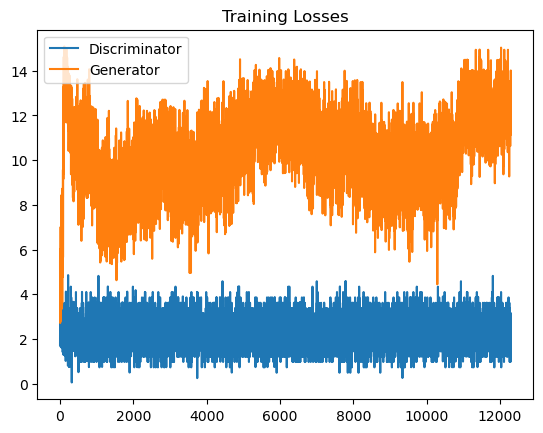

In [54]:
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.title("Training Losses")
plt.legend()

In [63]:
# Predictions on the test set

nr_batches_test = np.ceil(df_test_prep.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):    
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = df_test_prep[ran_from:ran_to]             
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=32,verbose=0)        
        results = np.append(results, tmp_rslt) 

C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [64]:
df_test_prep=df_test_ds[feature_cols]

In [65]:
# Predictions on the test set

nr_batches_test = np.ceil(df_test_prep.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = df_test_prep[ran_from:ran_to]
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=32,verbose=0)
        results = np.append(results, tmp_rslt)

In [66]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(results),pd.DataFrame(df_test_y['anomaly'].values)], axis=1)
results_df.columns = ['results','y_test']
print ('Mean score for normal signals :', results_df.loc[results_df['y_test'] == 0, 'results'].mean() )
print ('Mean score for anomalous signals :', results_df.loc[results_df['y_test'] == 1, 'results'].mean())

Mean score for normal signals : 0.7286449126924328
Mean score for anomalous signals : 1.3931681896959032


In [70]:
#Obtaining the lowest 1% score
per = np.percentile(results,12.5)
y_pred = results.copy()
y_pred = np.array(y_pred)

#Thresholding based on the score
inds = (y_pred > per)
inds_comp = (y_pred <= per)
y_pred[inds] = 0
y_pred[inds_comp] = 1

In [71]:
from sklearn.metrics import classification_report


# Predictions on the test set
nr_batches_test = np.ceil(df_test_prep.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = df_test_prep[ran_from:ran_to]
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=32,verbose=0)
        results = np.append(results, tmp_rslt)

# Convert results to binary class labels
binary_results = (results > 0.5).astype(int)

# Obtain ground truth labels
true_labels = np.zeros_like(binary_results)
true_labels[:results.shape[0]] = 1

# Calculate classification report
report = classification_report(true_labels, binary_results)
print(report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97       594

    accuracy                           0.94       594
   macro avg       0.50      0.47      0.48       594
weighted avg       1.00      0.94      0.97       594



C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix :


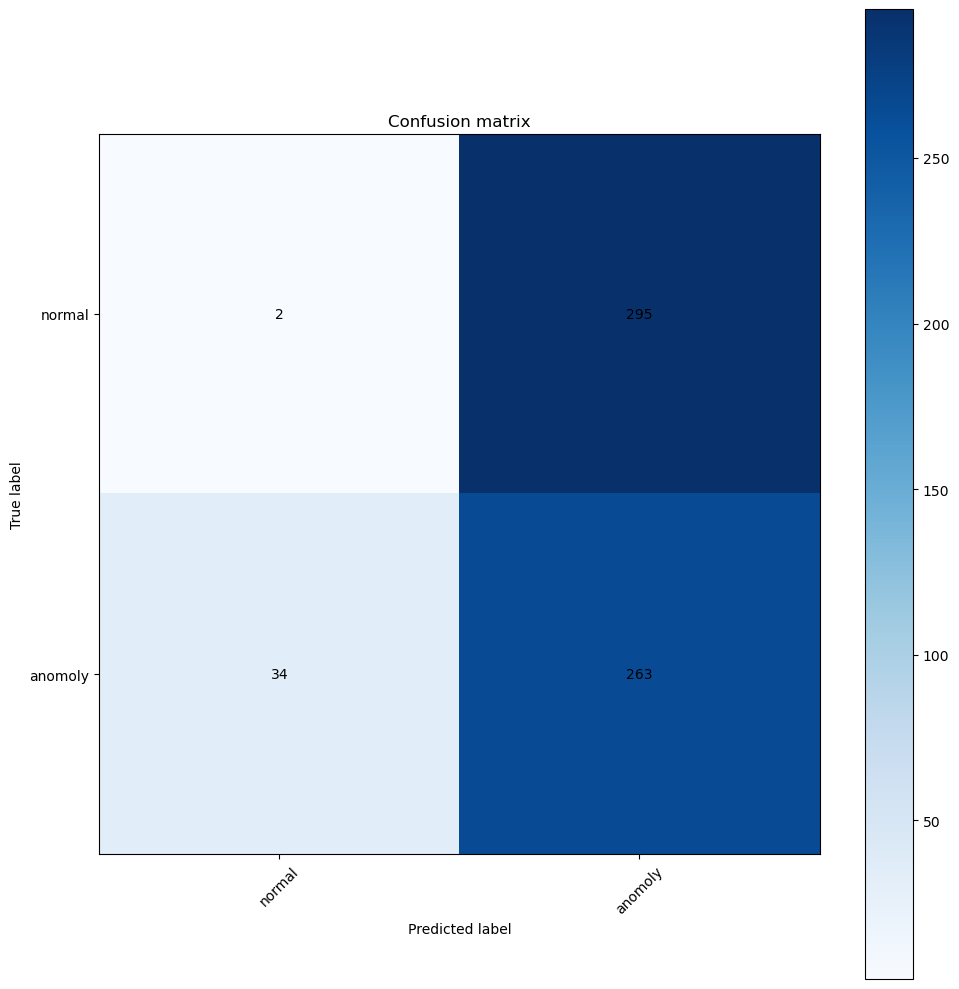

In [77]:
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

cm = confusion_matrix(df_test_y['anomaly'].values, y_pred_binary)  # Use y_pred_binary instead of y_pred

target_names = ['normal', 'anomoly']

print ('Confusion Matrix :')

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                         horizontalalignment='center',
                         verticalalignment='center')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm, target_names)


In [78]:
# Calculate metrics
TP = 263
TN = 2
FP = 34
FN = 295

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP)

# Recall (Sensitivity or True Positive Rate)
recall = TP / (TP + FN)

# F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.44612794612794615
Precision: 0.8855218855218855
Recall: 0.471326164874552
F1-score: 0.6152046783625731
